In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import time
from datetime import datetime
from IPython.display import display, clear_output
from sklearn.preprocessing import MinMaxScaler

# Set up the style for seaborn
sns.set(style="whitegrid")

# Function to fetch historical price data
def fetch_data(symbol, period="1mo", interval="5m"):
    df = yf.download(symbol, period=period, interval=interval)
    return df

# Function to calculate moving averages
def calculate_moving_averages(df, short_window=5, long_window=20):
    df['Short_MA'] = df['Close'].rolling(window=short_window).mean()
    df['Long_MA'] = df['Close'].rolling(window=long_window).mean()
    return df

# Function to simulate trading
def trade_bot(symbol, initial_investment, trade_duration):
    df = fetch_data(symbol)
    df = calculate_moving_averages(df)

    # Variables for trading
    balance = initial_investment
    crypto_holding = 0
    entry_price = 0

    for index, row in df.iterrows():
        # Check for buy signal
        if row['Short_MA'] > row['Long_MA'] and balance > 0:
            entry_price = row['Close']
            crypto_holding = balance / entry_price
            balance = 0  # All funds are now invested
            print(f"Purchased at {entry_price:.2f} on {index.date()}")

        # Check for sell signal
        elif row['Short_MA'] < row['Long_MA'] and crypto_holding > 0:
            exit_price = row['Close']
            balance = crypto_holding * exit_price
            profit_percentage = ((exit_price - entry_price) / entry_price) * 100
            print(f"Sold at {exit_price:.2f} on {index.date()}, Profit: {profit_percentage:.2f}%")
            crypto_holding = 0  # Sold all holdings

        # Break after the trade duration is reached
        if (index - df.index[0]).days >= trade_duration:
            break

    return balance, crypto_holding

# Function to plot the price and moving averages
def plot_graph(df):
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df, x=df.index, y='Close', label='Close Price', color='blue')
    sns.lineplot(data=df, x=df.index, y='Short_MA', label='Short MA', color='orange')
    sns.lineplot(data=df, x=df.index, y='Long_MA', label='Long MA', color='green')
    plt.title('Cryptocurrency Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Main execution flow
def main():
    symbol = "BTC-USD"
    initial_investment = float(input("Enter your initial investment amount (in USD): "))
    trade_duration = int(input("Enter the number of days for trading: "))

    # Fetch data and calculate moving averages
    df = fetch_data(symbol)
    df = calculate_moving_averages(df)

    # Display the initial graph
    plot_graph(df)

    # Run the trading bot
    final_balance, remaining_crypto = trade_bot(symbol, initial_investment, trade_duration)

    print(f"\nFinal Balance: {final_balance:.2f} USD")
    if remaining_crypto > 0:
        print(f"Remaining Crypto Holding: {remaining_crypto:.4f} BTC")

# Run the program
if __name__ == "__main__":
    main()


Starting real-time price simulation...


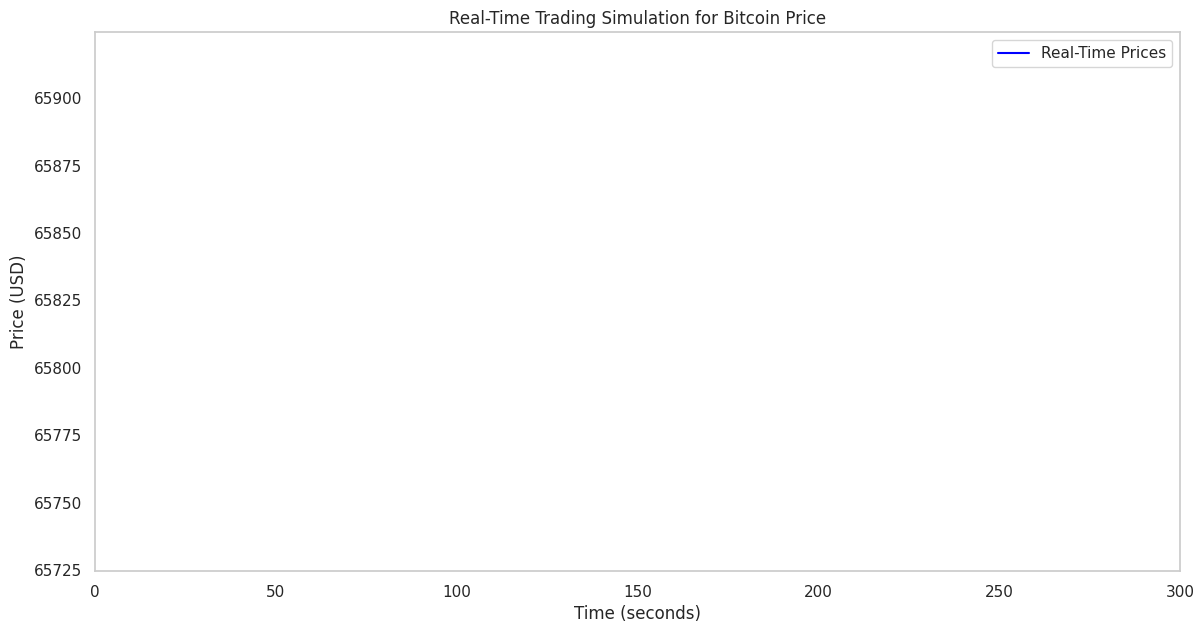

Current Price: 65824.50 USD


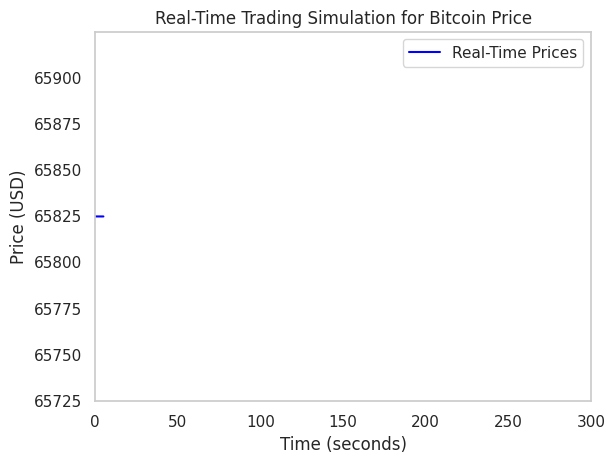

Current Price: 65824.49 USD


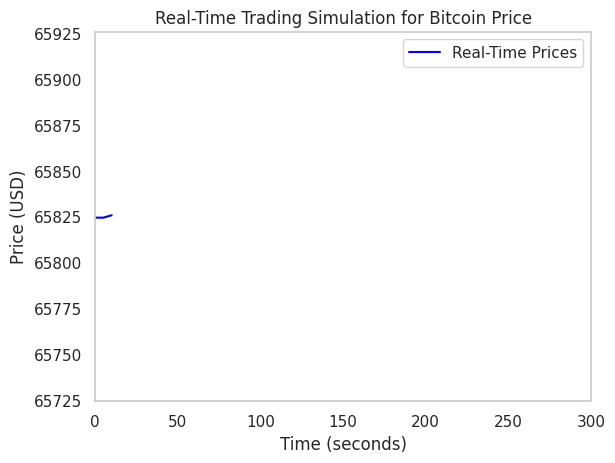

Current Price: 65825.81 USD


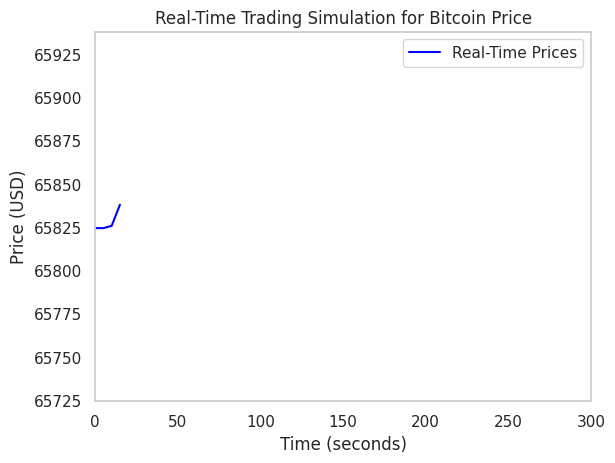

Current Price: 65838.00 USD


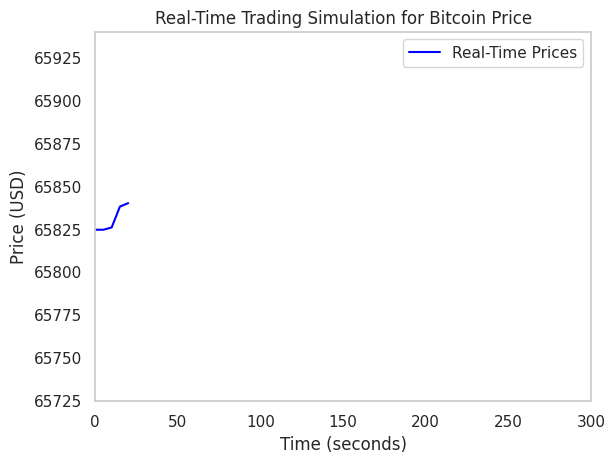

Current Price: 65839.99 USD


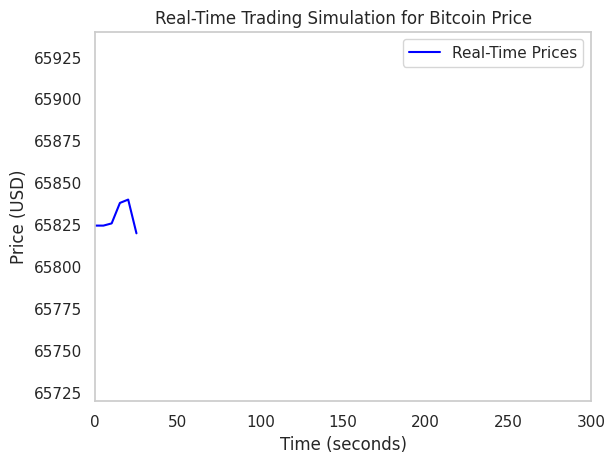

Current Price: 65819.90 USD


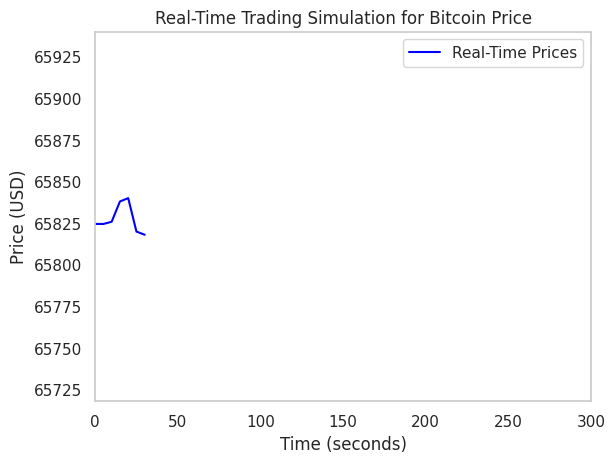

Current Price: 65818.01 USD


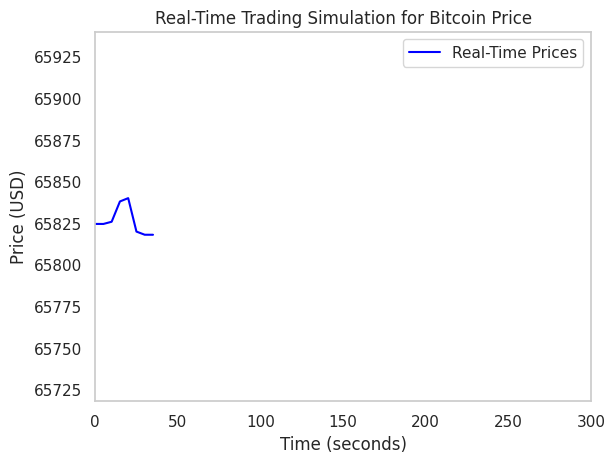

Current Price: 65818.00 USD


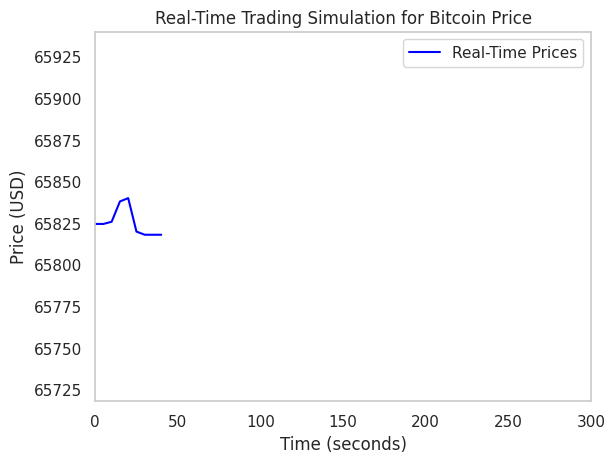

Current Price: 65818.00 USD


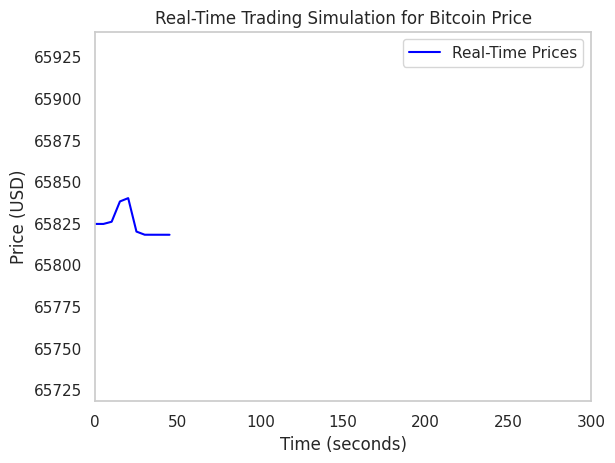

Current Price: 65817.99 USD


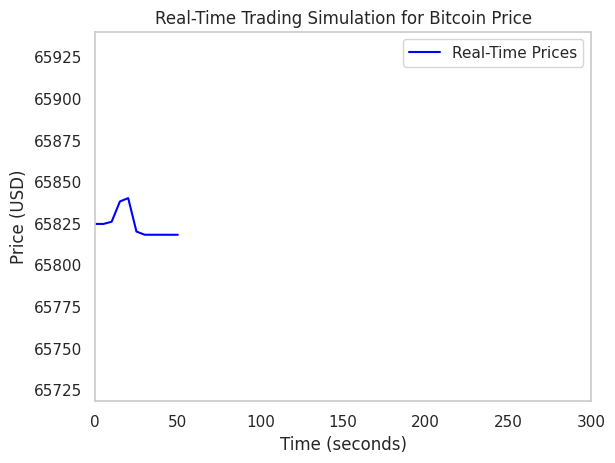

Current Price: 65817.99 USD


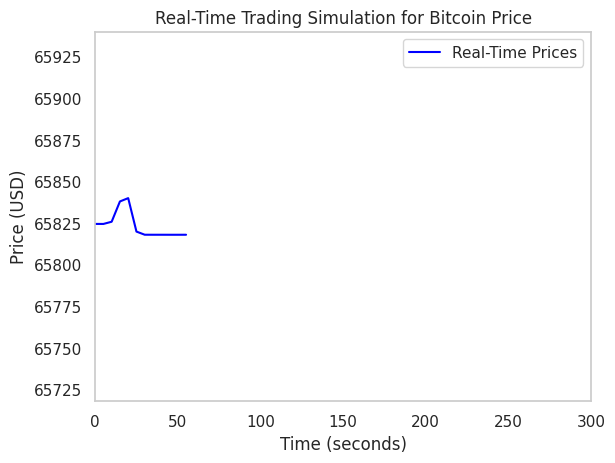

Current Price: 65818.00 USD


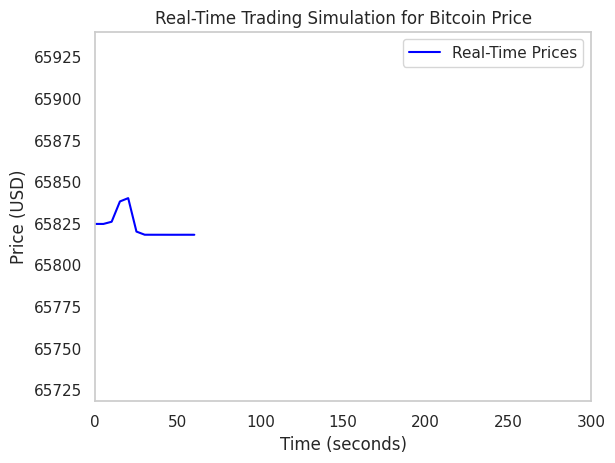

Current Price: 65817.99 USD


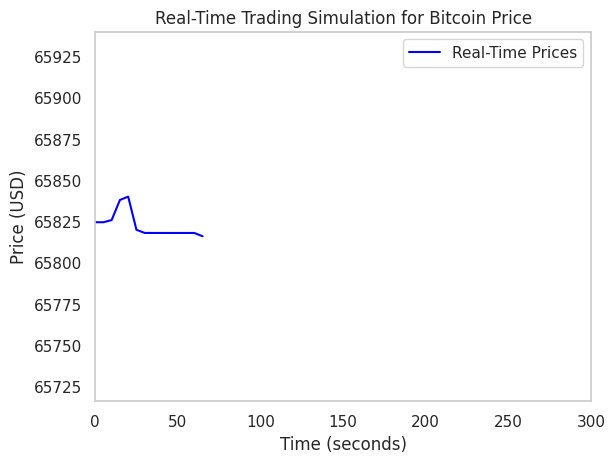

Current Price: 65816.01 USD


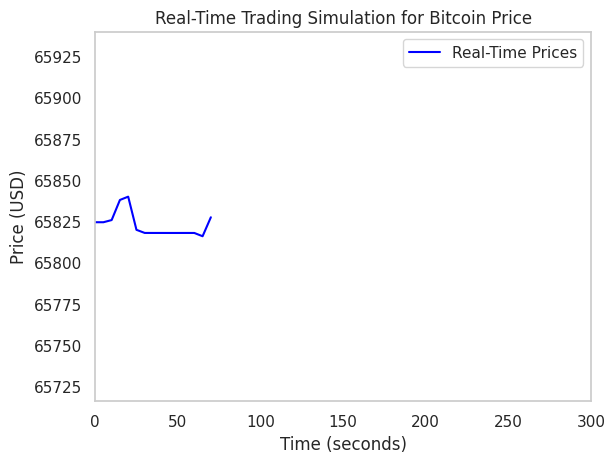

Current Price: 65827.50 USD


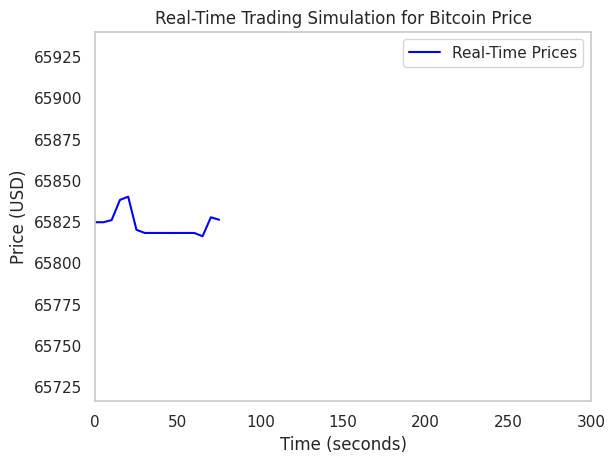

Current Price: 65826.00 USD


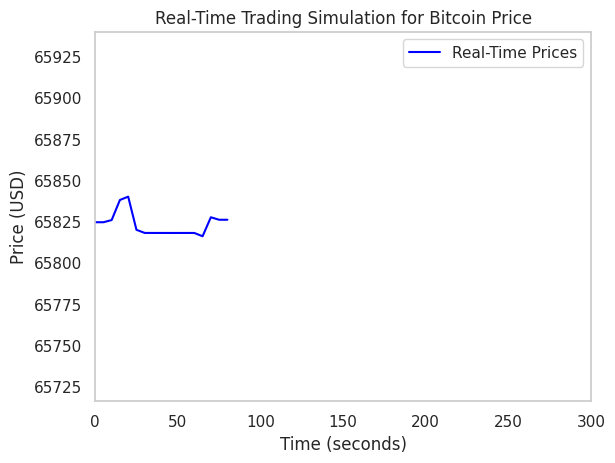

Current Price: 65826.00 USD


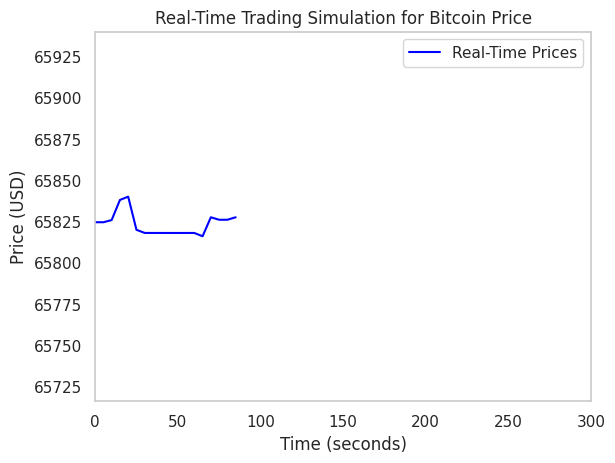

Current Price: 65827.50 USD


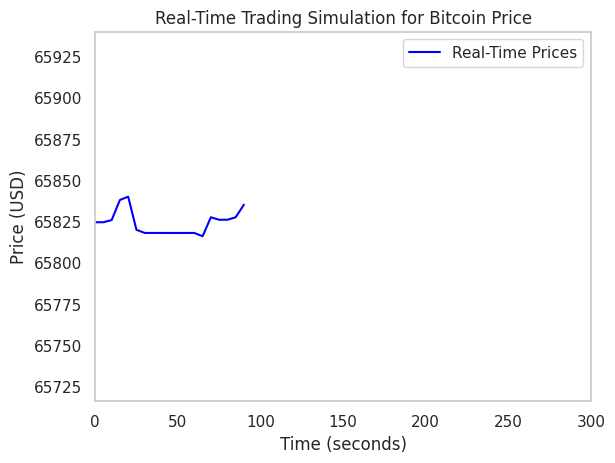

Current Price: 65835.14 USD


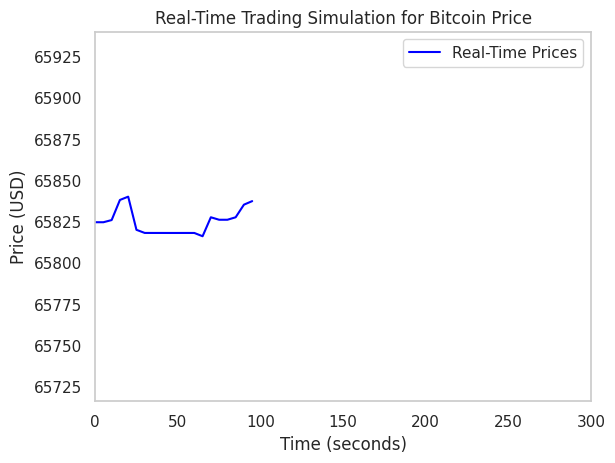

Current Price: 65837.29 USD


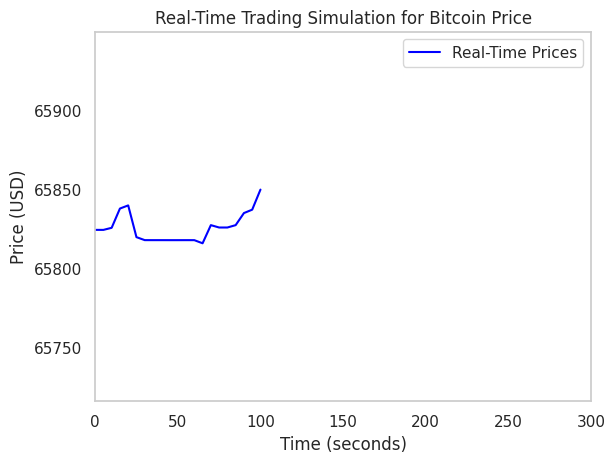

Current Price: 65849.99 USD


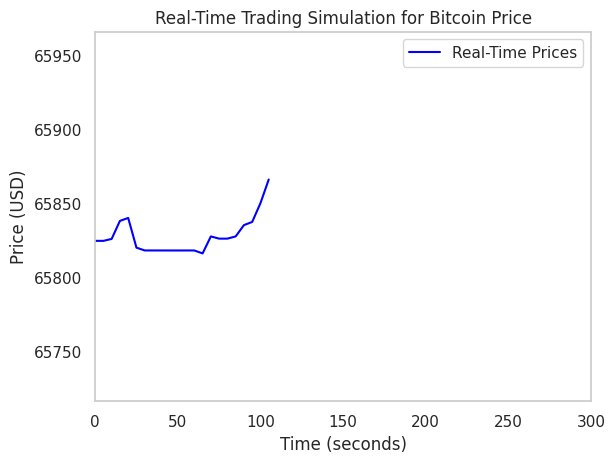

Current Price: 65866.00 USD


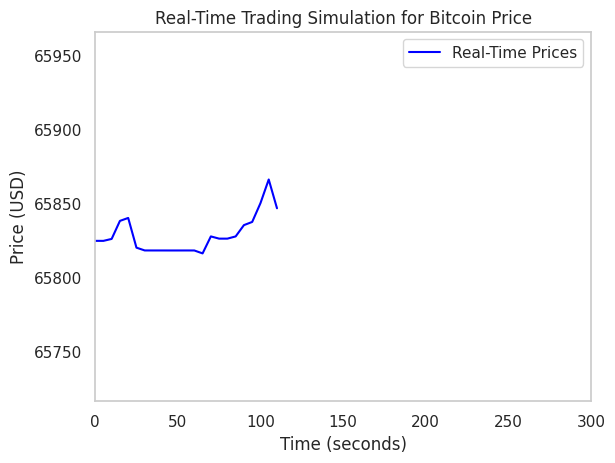

Current Price: 65846.54 USD


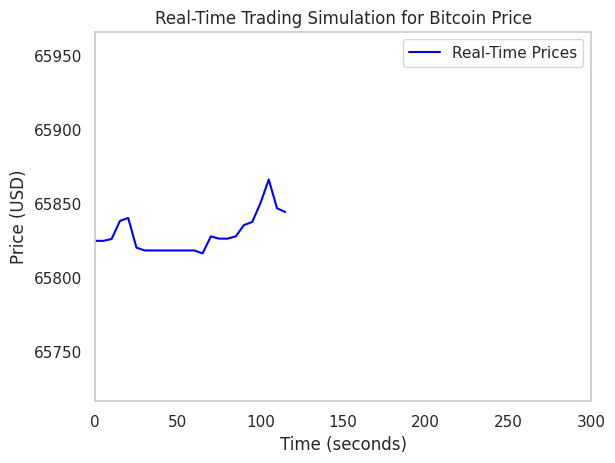

Current Price: 65844.01 USD


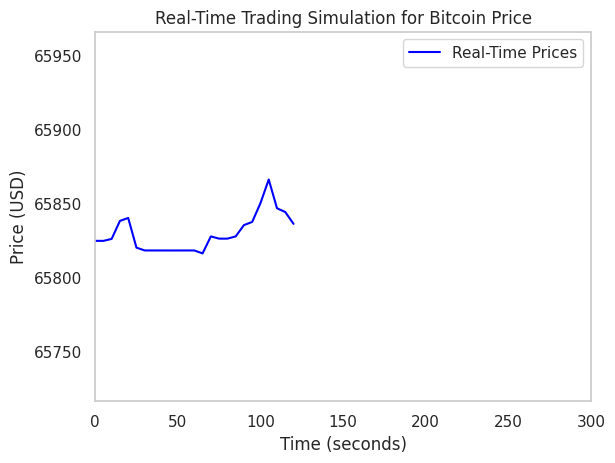

Current Price: 65836.00 USD


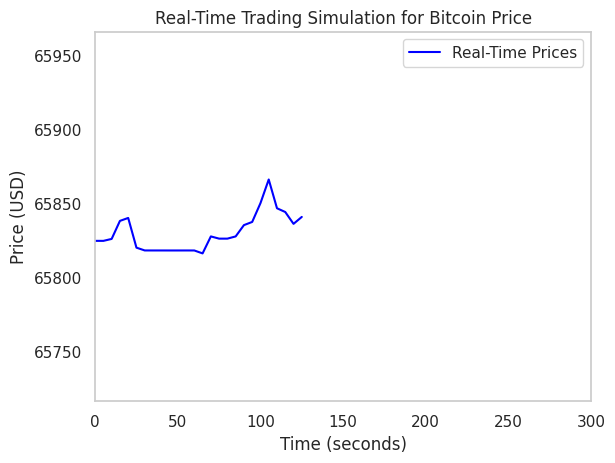

Current Price: 65840.69 USD


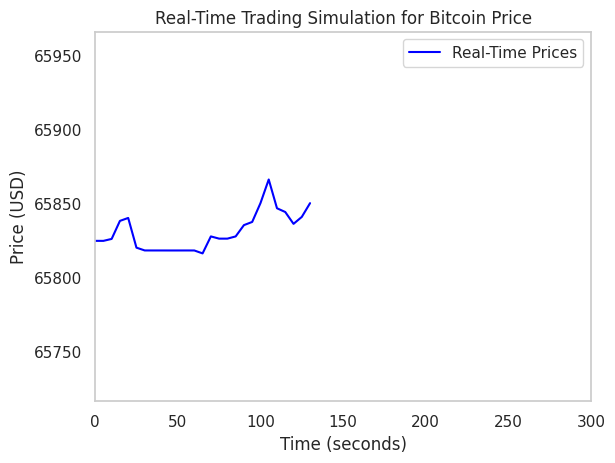

Current Price: 65850.00 USD


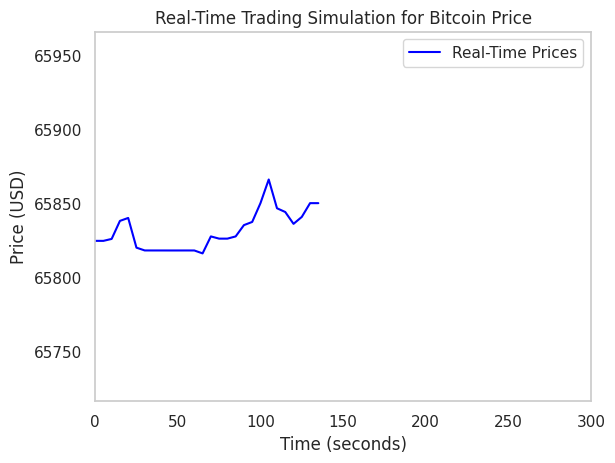

Current Price: 65850.00 USD


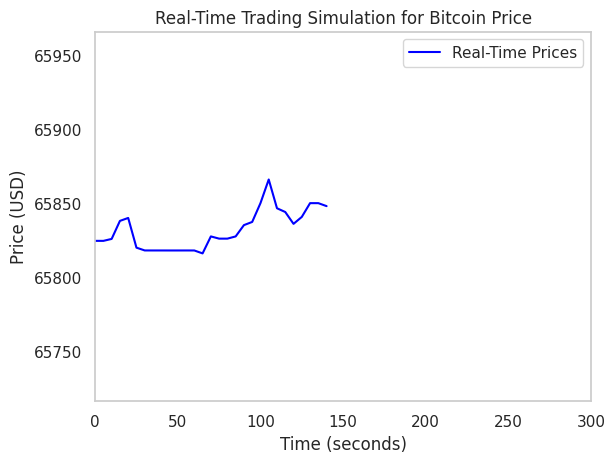

Current Price: 65847.99 USD


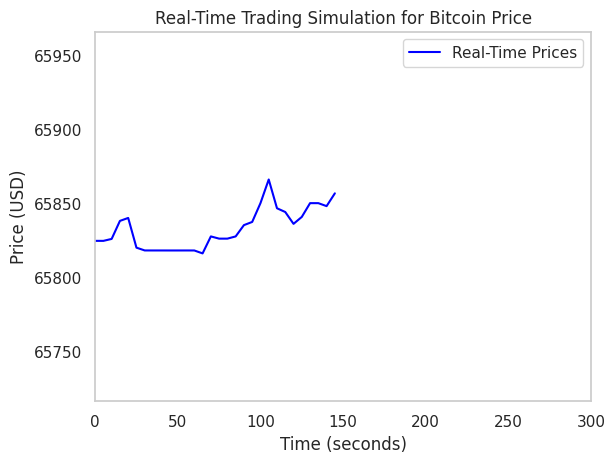

Current Price: 65856.64 USD


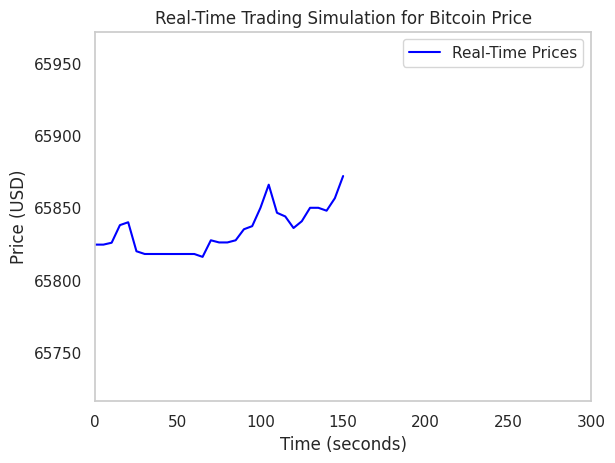

Current Price: 65872.00 USD


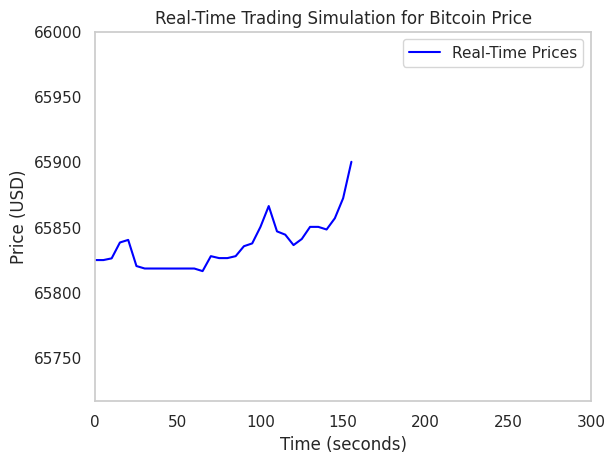

Current Price: 65900.01 USD


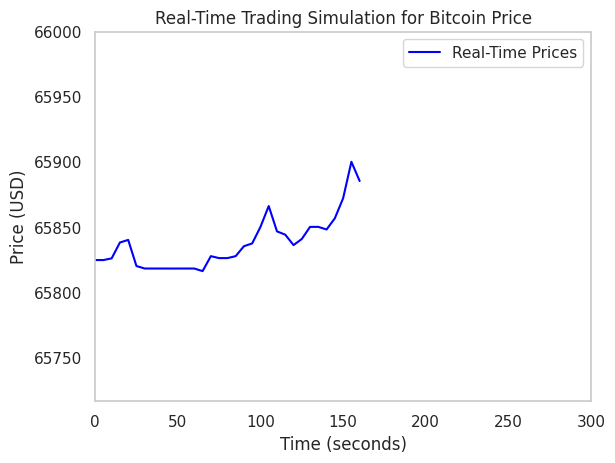

Current Price: 65885.23 USD


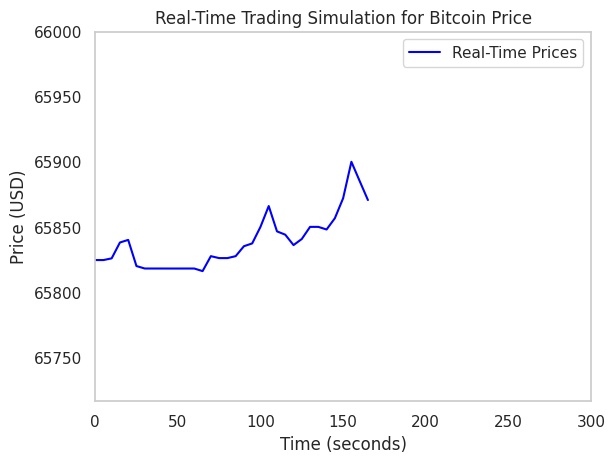

Current Price: 65870.62 USD


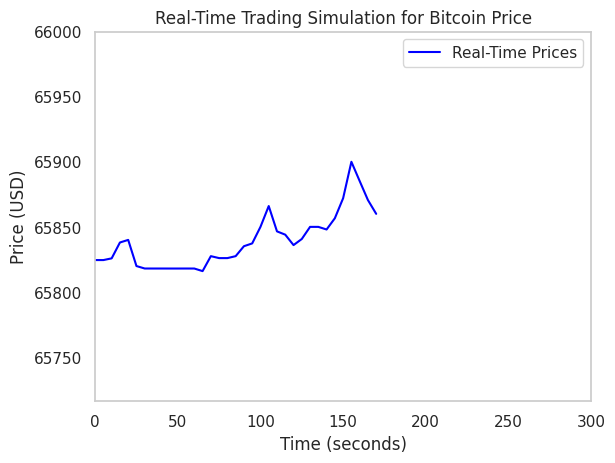

Current Price: 65860.01 USD


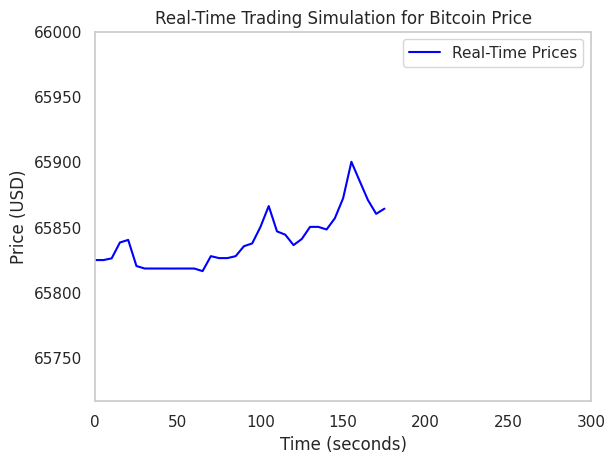

Current Price: 65864.01 USD


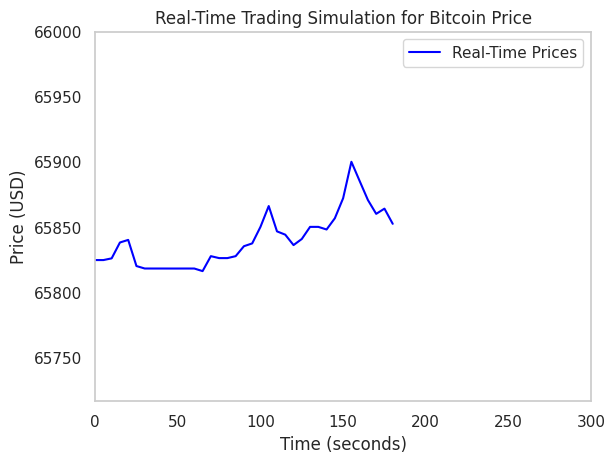

Current Price: 65852.35 USD


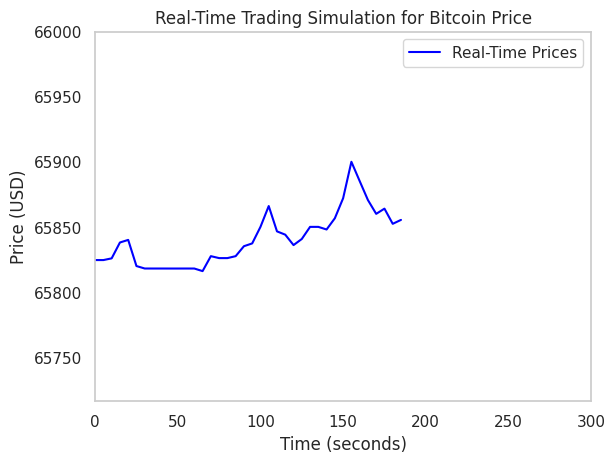

Current Price: 65855.36 USD


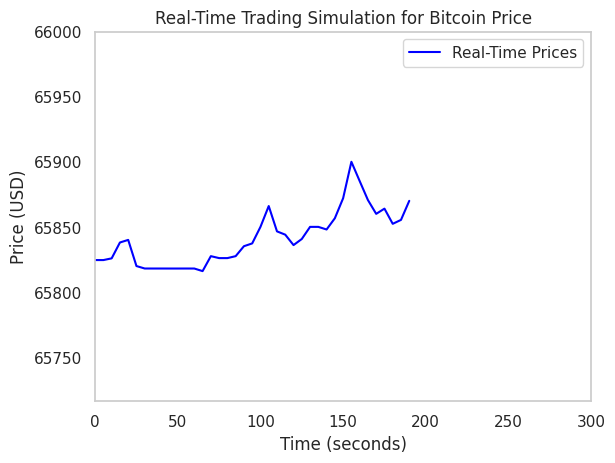

Current Price: 65870.00 USD


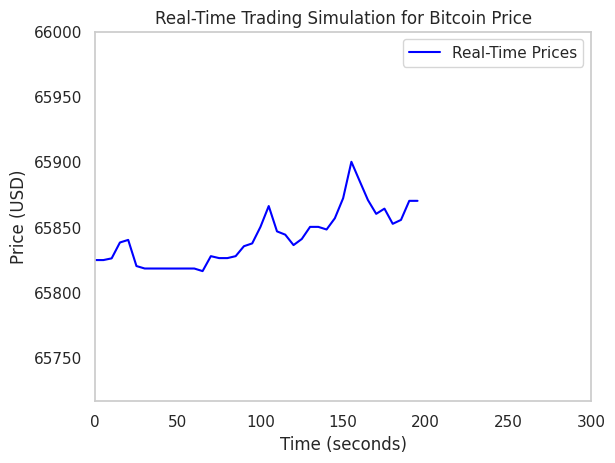

Current Price: 65870.01 USD


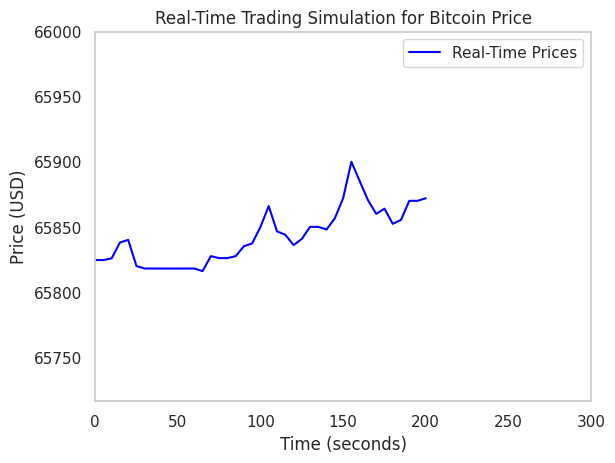

Current Price: 65871.99 USD


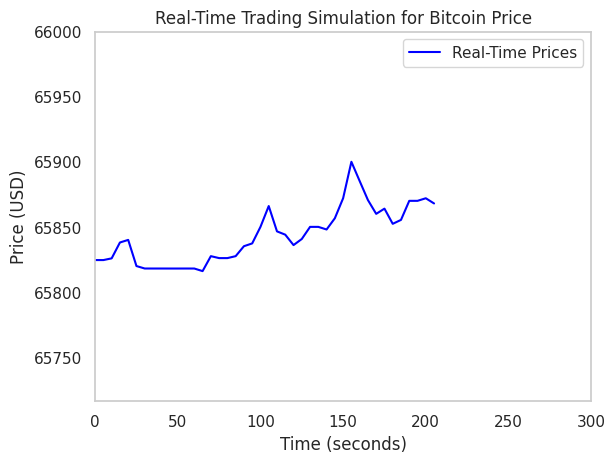

Current Price: 65868.00 USD


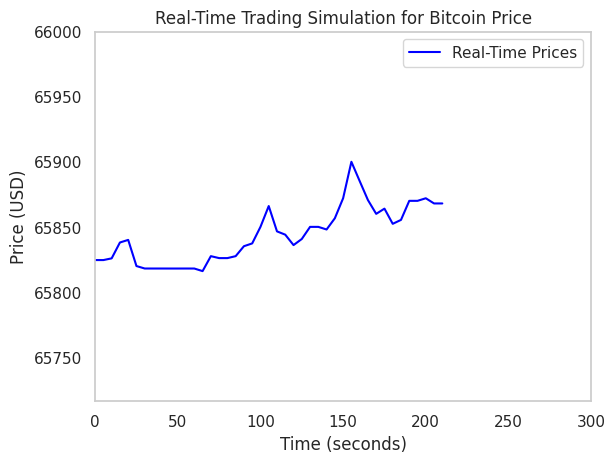

Current Price: 65868.00 USD


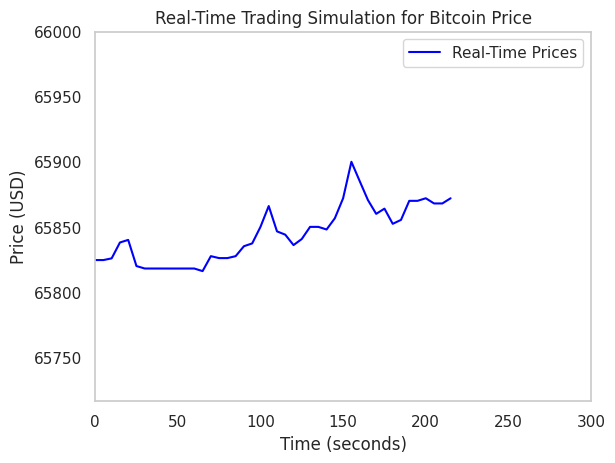

Current Price: 65871.98 USD


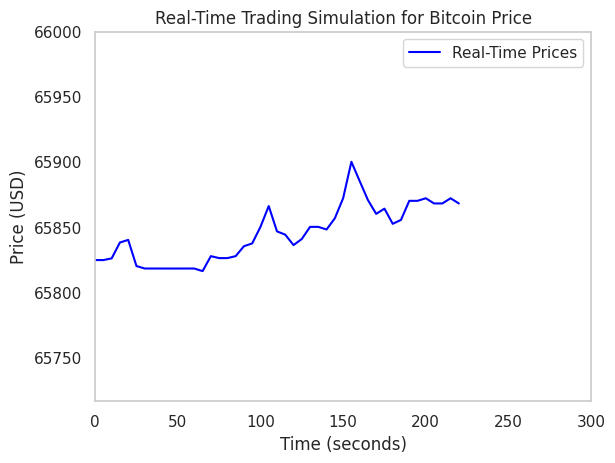

Current Price: 65868.00 USD


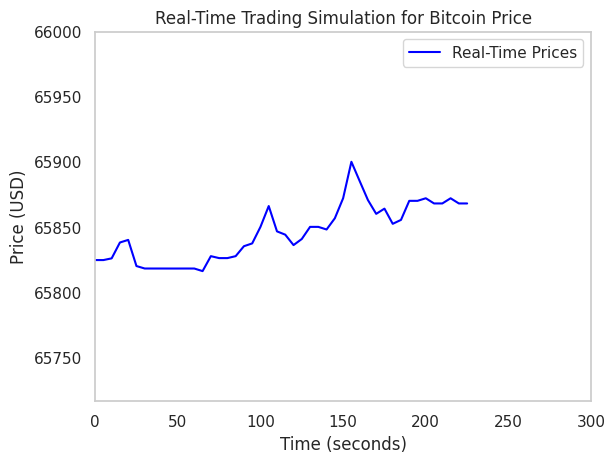

Current Price: 65868.00 USD


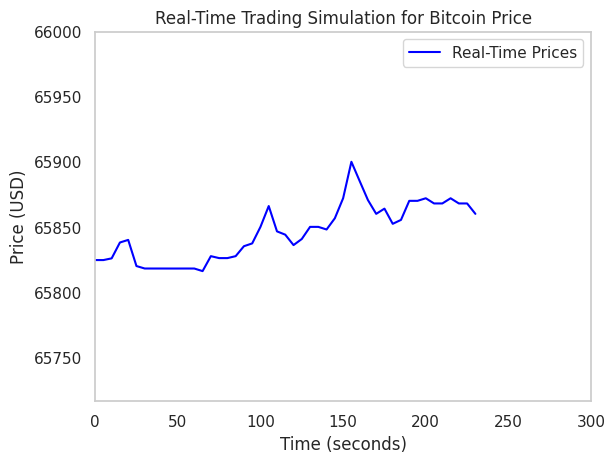

Current Price: 65860.01 USD


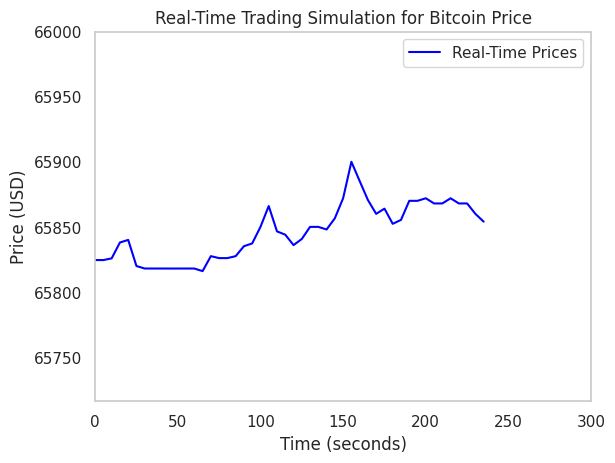

Current Price: 65854.00 USD


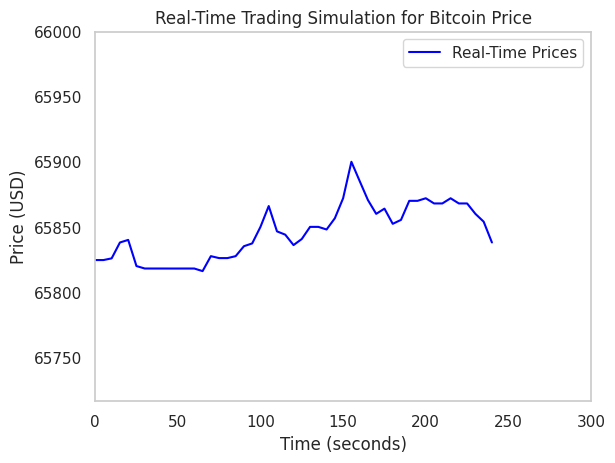

Current Price: 65838.01 USD


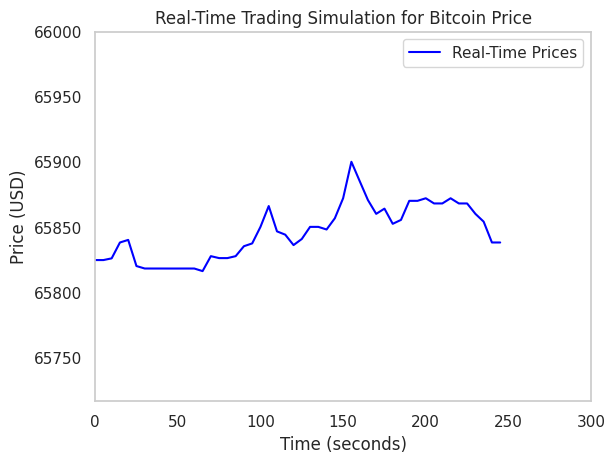

Current Price: 65838.00 USD


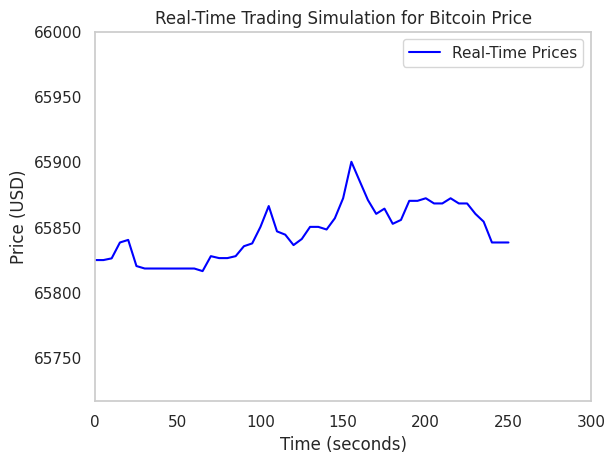

Current Price: 65838.01 USD


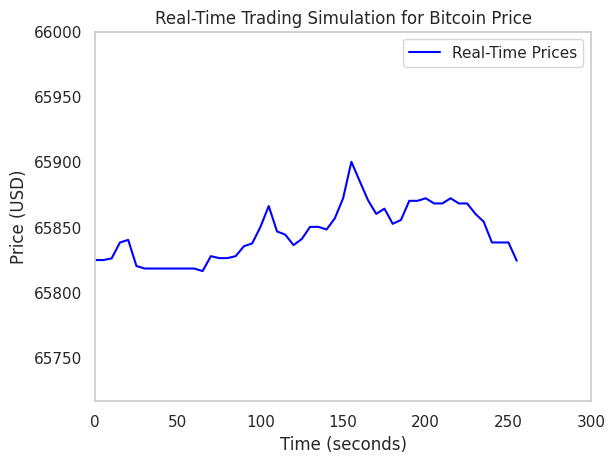

Current Price: 65824.00 USD


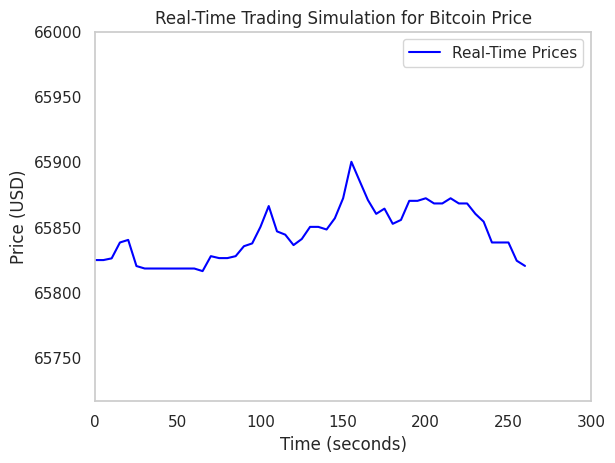

Current Price: 65820.00 USD


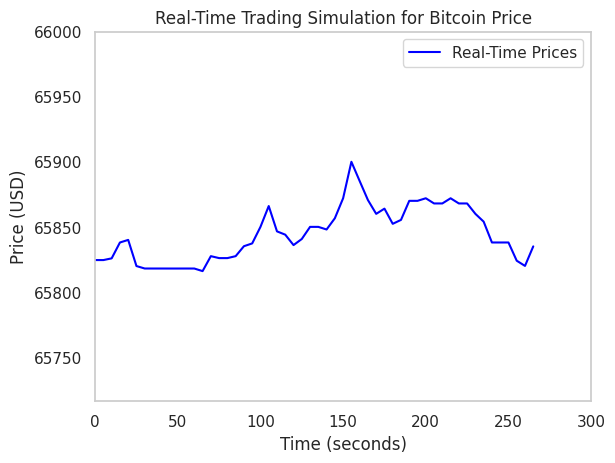

Current Price: 65835.01 USD


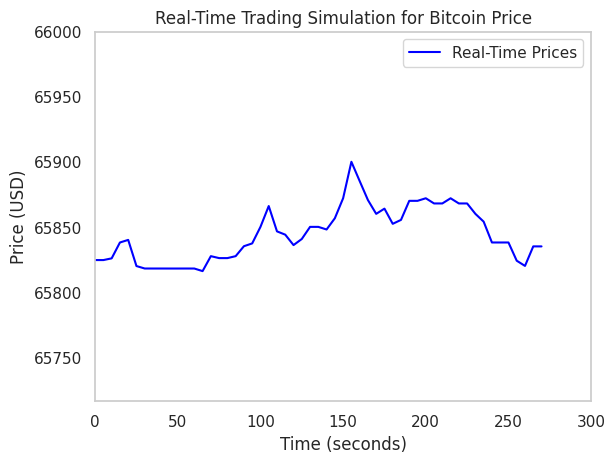

Current Price: 65835.00 USD


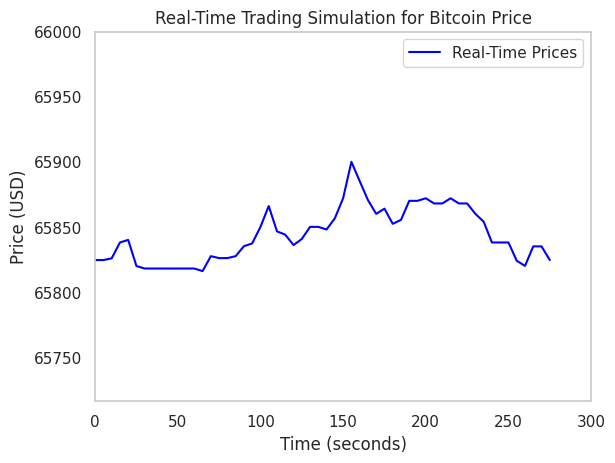

Current Price: 65824.50 USD


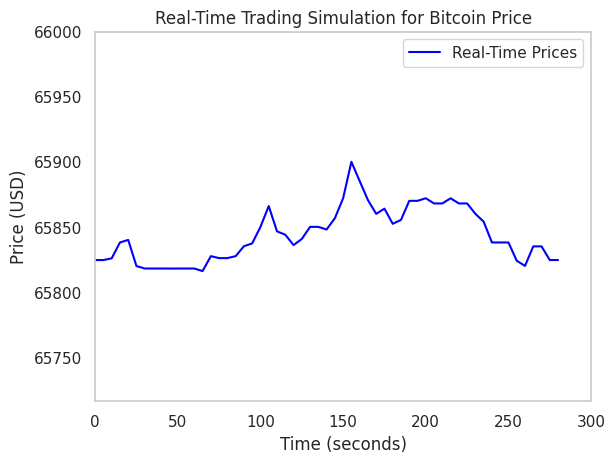

Current Price: 65824.51 USD


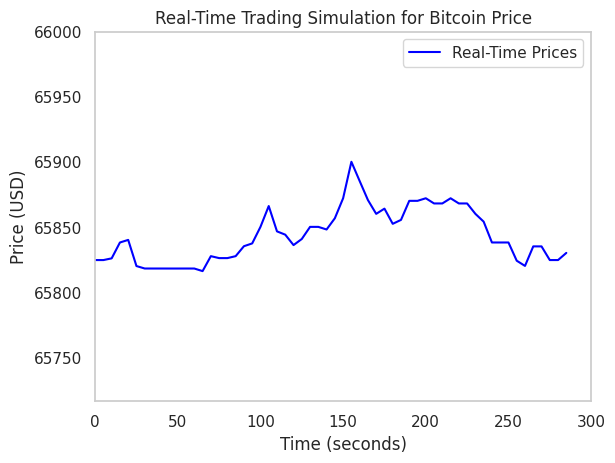

Current Price: 65830.00 USD


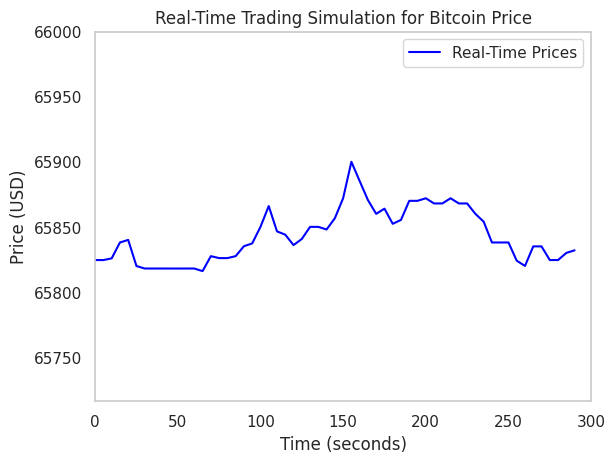

Current Price: 65831.98 USD


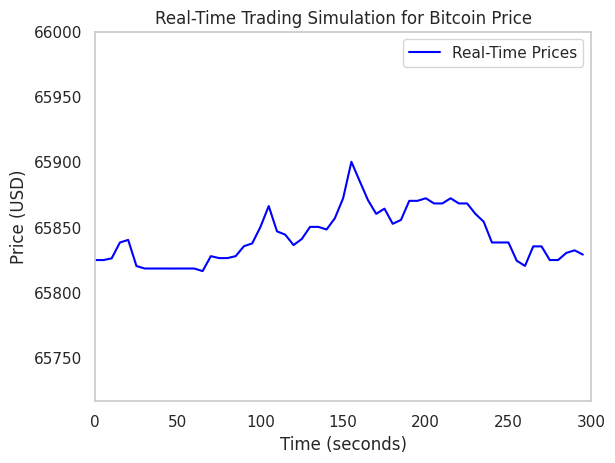

Current Price: 65828.71 USD

Initial Balance: $10000.00
Final Balance: $10000.00
Total Profit: $0.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ccxt
import time

# Set seaborn style
sns.set(style='whitegrid')

# Function to fetch real-time price data for a cryptocurrency
def fetch_real_time_data(exchange, symbol):
    # Fetch the last price from the exchange
    ticker = exchange.fetch_ticker(symbol)
    return ticker['last']

# Function to predict future prices using Linear Regression
def predict_prices(data, days_to_predict=5):
    predictions = []
    X = np.arange(len(data)).reshape(-1, 1)  # Use indices as features
    y = data['close'].values  # Close prices as target

    model = LinearRegression()
    model.fit(X, y)

    future_days = np.arange(len(data), len(data) + days_to_predict).reshape(-1, 1)
    predicted_prices = model.predict(future_days)

    return predicted_prices

# Function to simulate trading
def simulate_trading(real_time_prices, predicted_prices, initial_balance=10000):
    balance = initial_balance
    crypto_amount = 0  # Amount of cryptocurrency held
    trade_history = []

    for current_price, predicted_price in zip(real_time_prices, predicted_prices):
        signal = 'Buy' if current_price < predicted_price else 'Sell'

        if signal == 'Buy' and balance > 0:
            crypto_amount += balance / current_price  # Buy crypto
            trade_history.append(('Buy', current_price))
            balance = 0  # Spend all balance

        elif signal == 'Sell' and crypto_amount > 0:
            balance += crypto_amount * current_price  # Sell all crypto
            trade_history.append(('Sell', current_price))
            crypto_amount = 0  # Reset crypto amount

    # Calculate final balance and profit
    final_balance = balance + crypto_amount * real_time_prices[-1] if crypto_amount > 0 else balance
    profit = final_balance - initial_balance

    return trade_history, final_balance, profit

# Set up the exchange and symbol
exchange = ccxt.binance()  # You can choose other exchanges
symbol = 'BTC/USDT'  # Trading pair (e.g., Bitcoin to USDT)

# Fetch historical price data for predictions
historical_data = exchange.fetch_ohlcv(symbol, timeframe='1d', limit=30)  # Last 30 days
historical_prices = pd.DataFrame(historical_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
historical_prices['Date'] = pd.to_datetime(historical_prices['timestamp'], unit='ms')
historical_prices.set_index('Date', inplace=True)

# Predict future prices for the next 5 days
predicted_prices = predict_prices(historical_prices, days_to_predict=5)

# Initialize lists for real-time prices and time
real_time_prices = []
time_stamps = []

# Plotting setup
plt.figure(figsize=(14, 7))
plt.ion()  # Enable interactive mode
plt.title('Real-Time Trading Simulation for Bitcoin Price')
plt.xlabel('Time (in minutes)')
plt.ylabel('Price (USD)')
plt.grid()

# Real-time price simulation
print("Starting real-time price simulation...")
for i in range(60):  # Simulate for 60 seconds (12 updates)
    price = fetch_real_time_data(exchange, symbol)
    real_time_prices.append(price)
    time_stamps.append(i * 5)  # Increment time by 5 seconds

    # Clear and update the plot
    plt.clf()  # Clear the current figure
    sns.lineplot(x=time_stamps, y=real_time_prices, label='Real-Time Prices', color='blue')

    # Set the plot limits and titles
    plt.xlim(0, 300)  # Adjust x-axis limit to accommodate 60 seconds
    plt.ylim(min(real_time_prices) - 100, max(real_time_prices) + 100)  # Adjust y-axis for visibility
    plt.title('Real-Time Trading Simulation for Bitcoin Price')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.pause(5)  # Pause for 5 seconds before the next update
    print(f"Current Price: {price:.2f} USD")

# Simulate trading
initial_balance = 10000
trade_history, final_balance, profit = simulate_trading(real_time_prices, predicted_prices, initial_balance)

# Print trading results
print(f"\nInitial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Total Profit: ${profit:.2f}")

# Final plot after simulation ends
plt.show()
